# Project Name    - Iris Flower Classification

#### Project Type    - Classification
#### Contribution    - Individual
#### Team Member -  prathamesh Prakash Khochare

# **Project Summary -**

The project focuses on the classification of iris flowers using the decision tree algorithm. To accomplish this task, several Python libraries such as NumPy, Pandas, Matplotlib, and Seaborn were utilized. These libraries provide essential functionalities for data manipulation, visualization, and analysis.

The dataset used for this project contains various attributes of iris flowers, such as sepal length, sepal width, petal length, and petal width. The goal is to train a decision tree model to predict the correct species of the iris flower based on these attributes.

Data preprocessing techniques were employed to handle missing values, normalize the data, and split it into training and testing sets. Exploratory data analysis was conducted using scatter plots, heatmaps, and pair plots to gain insights into the relationships between different attributes and the target variable.

The decision tree algorithm was then implemented, and hyperparameter tuning was performed to optimize the model's performance. The decision tree graph was generated to visualize the decision-making process of the trained model.

Overall, the project successfully developed a classification model using the decision tree algorithm to predict the species of iris flowers. The visualizations and exploratory analysis provided valuable insights into the dataset, enhancing the understanding of the relationships between the attributes.

# **GitHub Link -**

# **Problem Statement**

* Create a Decision Tree Classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Importing module to see execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

time: 16 ms (started: 2023-08-12 22:49:29 +05:30)


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [2]:
iris = pd.read_csv(r"C:\Users\Prathamesh\anaconda3\pkgs\bokeh-2.4.3-py310haa95532_0\Lib\site-packages\bokeh\sampledata\_data\iris.csv")

time: 31 ms (started: 2023-08-12 22:49:35 +05:30)


### Dataset First View

In [6]:
#Top 5
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


time: 16 ms (started: 2023-08-07 17:12:41 +05:30)


In [7]:
# Bottom 5
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


time: 16 ms (started: 2023-08-07 17:14:30 +05:30)


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
print(f" rows in IRIS data are {iris.shape[0]} and columns are {iris.shape[1]}")

 rows in IRIS data are 150 and columns are 5
time: 0 ns (started: 2023-08-07 17:16:19 +05:30)


In [10]:
#shape
iris.shape

(150, 5)

time: 0 ns (started: 2023-08-07 17:14:53 +05:30)


### Dataset Information

In [12]:
# concise summary of the dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
time: 16 ms (started: 2023-08-07 17:17:20 +05:30)


#### Duplicate Values

In [3]:
# Dataset Duplicate Value Count
len(iris[iris.duplicated()])

1

time: 16 ms (started: 2023-08-12 22:49:49 +05:30)


In [4]:
# Dropping Duplicated rows
iris.drop_duplicates(inplace=True)

time: 0 ns (started: 2023-08-12 22:49:51 +05:30)


#### Missing Values/Null Values

In [5]:
# Missing Values/Null Values Count
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
time: 15 ms (started: 2023-08-12 22:50:00 +05:30)


In [6]:
# Infinite values check
iris.isin([np.inf, -np.inf]).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

time: 0 ns (started: 2023-08-12 22:50:03 +05:30)


#### Categorical Features check

In [7]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df[col].unique())

time: 0 ns (started: 2023-08-12 22:50:07 +05:30)


In [8]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['species']
cat_unique_vals(categorical_columns,iris)

The values that the categorical column species can take are: ['setosa' 'versicolor' 'virginica']
time: 0 ns (started: 2023-08-12 22:50:09 +05:30)


### What did you know about your dataset?

Till now we get to know the following points about our dataset:

'Iris' Dataset is having 150 rows and 4 columns and does not have any null value.

There is 1 duplicate value present in the dataset. There are no null and infinite values present in the dataset.

There are total 1 categorical features in dataset namely 'species' and 3 Numerical features present in dataset.

**species** is our **Dependent feature** which have categorical values as 'setosa' 'versicolor' 'virginica'

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

time: 0 ns (started: 2023-08-12 22:50:16 +05:30)


In [10]:
# Dataset Describe
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,149.0,5.843624,0.830851,4.3,5.1,5.8,6.4,7.9
sepal_width,149.0,3.059732,0.436342,2.0,2.8,3.0,3.3,4.4
petal_length,149.0,3.748993,1.767791,1.0,1.6,4.3,5.1,6.9
petal_width,149.0,1.194631,0.762622,0.1,0.3,1.3,1.8,2.5


time: 31 ms (started: 2023-08-12 22:50:18 +05:30)


In [30]:
# Dataset Info
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
time: 0 ns (started: 2023-08-07 18:14:18 +05:30)


#### We will rename our column names for convinient

In [11]:
iris.rename(columns={'sepal_length':'sl','sepal_width':'sw','petal_length':'pl','petal_width':'pw'},inplace= True)

time: 0 ns (started: 2023-08-12 22:50:23 +05:30)


In [12]:
iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


time: 16 ms (started: 2023-08-12 22:50:25 +05:30)


### Boxplot

In [13]:
# function for check of 'Annual_Premium_Treated' with Boxplot and Distribution plot
def show_box_plot(df):

    fig, axes = plt.subplots(2, 2, figsize=(20,8))
    sns.boxplot(ax = axes[0][0], y = 'sl',x = 'species', data = iris)
    axes[0][0].set_xlabel(xlabel = 'species', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'sepal_length', fontdict={'fontsize': 14})
    axes[0][0].set_title('Comparison of Sepal Length', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1], y = 'sw',x = 'species', data = iris)
    axes[0][1].set_xlabel(xlabel = 'species', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'sepal_width', fontdict={'fontsize': 14})
    axes[0][1].set_title('Comparison of Sepal width', fontdict={'fontsize': 15,  'fontweight' :'bold'})
    
    sns.boxplot(ax = axes[1][0], y = 'pl',x = 'species', data = iris)
    axes[1][0].set_xlabel(xlabel = 'species', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'petal_length', fontdict={'fontsize': 14})
    axes[1][0].set_title('Comparison of Petal Length', fontdict={'fontsize': 15,  'fontweight' :'bold'})
    
    sns.boxplot(ax = axes[1][1], y = 'pw',x = 'species', data = iris)
    axes[1][1].set_xlabel(xlabel = 'species', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'petal_width', fontdict={'fontsize': 14})
    axes[1][1].set_title('Comparison of Petal width', fontdict={'fontsize': 15,  'fontweight' :'bold'})

time: 0 ns (started: 2023-08-12 22:53:05 +05:30)


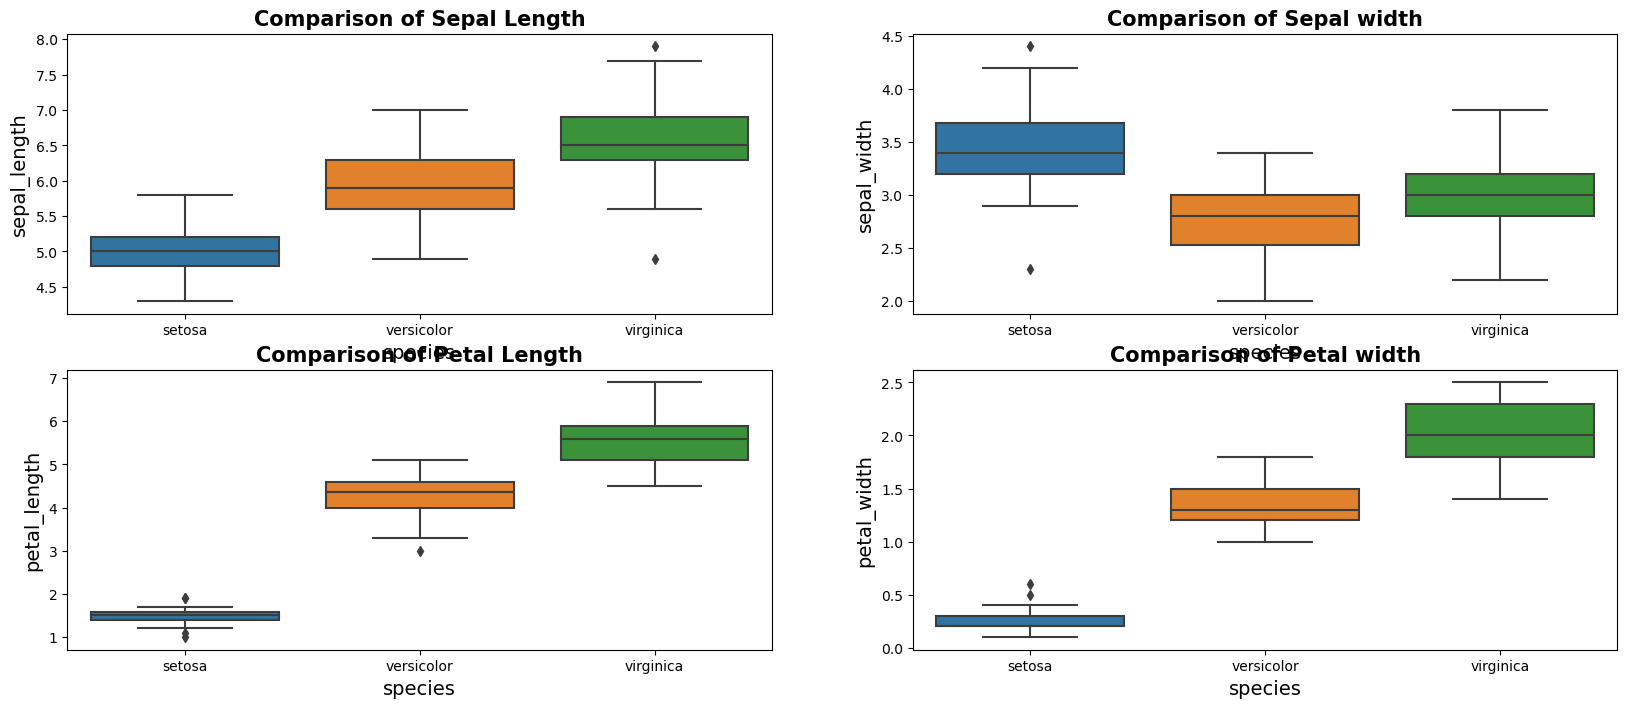

time: 703 ms (started: 2023-08-12 22:53:09 +05:30)


In [14]:
show_box_plot(iris)

Observations - 
It is seen from above Box plot, we can easily differenciate Setosa species by looking into petal length, Sepal length, Petal width.

Verginaca Species has higher Sepal length,Petal length and Petal width 

Before going to further analysis, we can conclude following possibility criteria amoung Iris Species -
 1. Setosa - Lower range(cm) - Lower Sepal length,Petal length and Petal width but higher Sepal width
 2. Versicolor- Moderate range - Moderate Sepal length,Petal length and Petal width but lower Sepal width 
 3. Verginica - Higher range - Higher Sepal length,Petal length and Petal width but moderate Sepal width 

#### Scatter plot between PW and PL

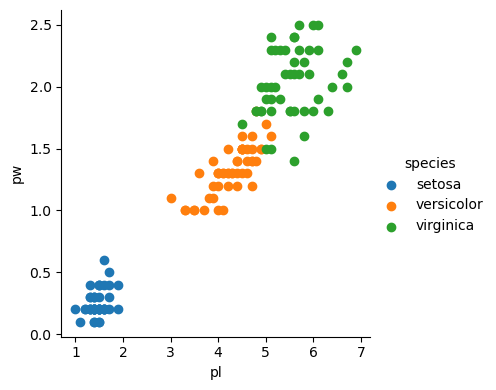

time: 672 ms (started: 2023-08-07 19:54:30 +05:30)


In [58]:
# classifying the dataset through visualization
sns.FacetGrid(iris, hue="species",height=4).map(plt.scatter,"pl","pw").add_legend()

#### Scatter plot between SL and PL

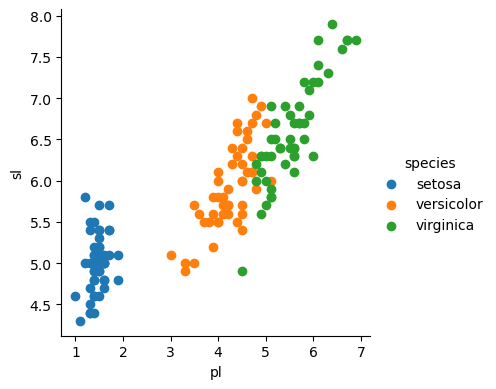

time: 735 ms (started: 2023-08-07 19:54:38 +05:30)


In [59]:
# classifying the dataset through visualization
sns.FacetGrid(iris, hue="species",height=4).map(plt.scatter,"pl","sl").add_legend()

#### Scatter plot between SL and PW

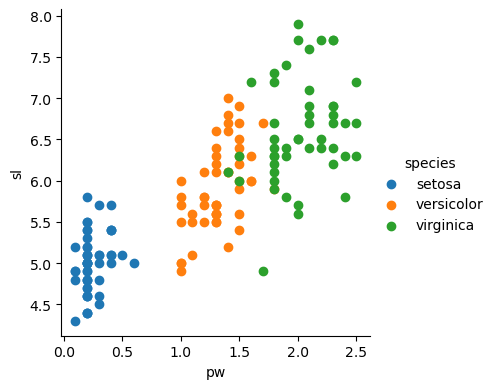

time: 672 ms (started: 2023-08-07 19:55:21 +05:30)


In [60]:
# classifying the dataset through visualization
sns.FacetGrid(iris, hue="species",height=4).map(plt.scatter,"pw","sl").add_legend()

### PairPlot

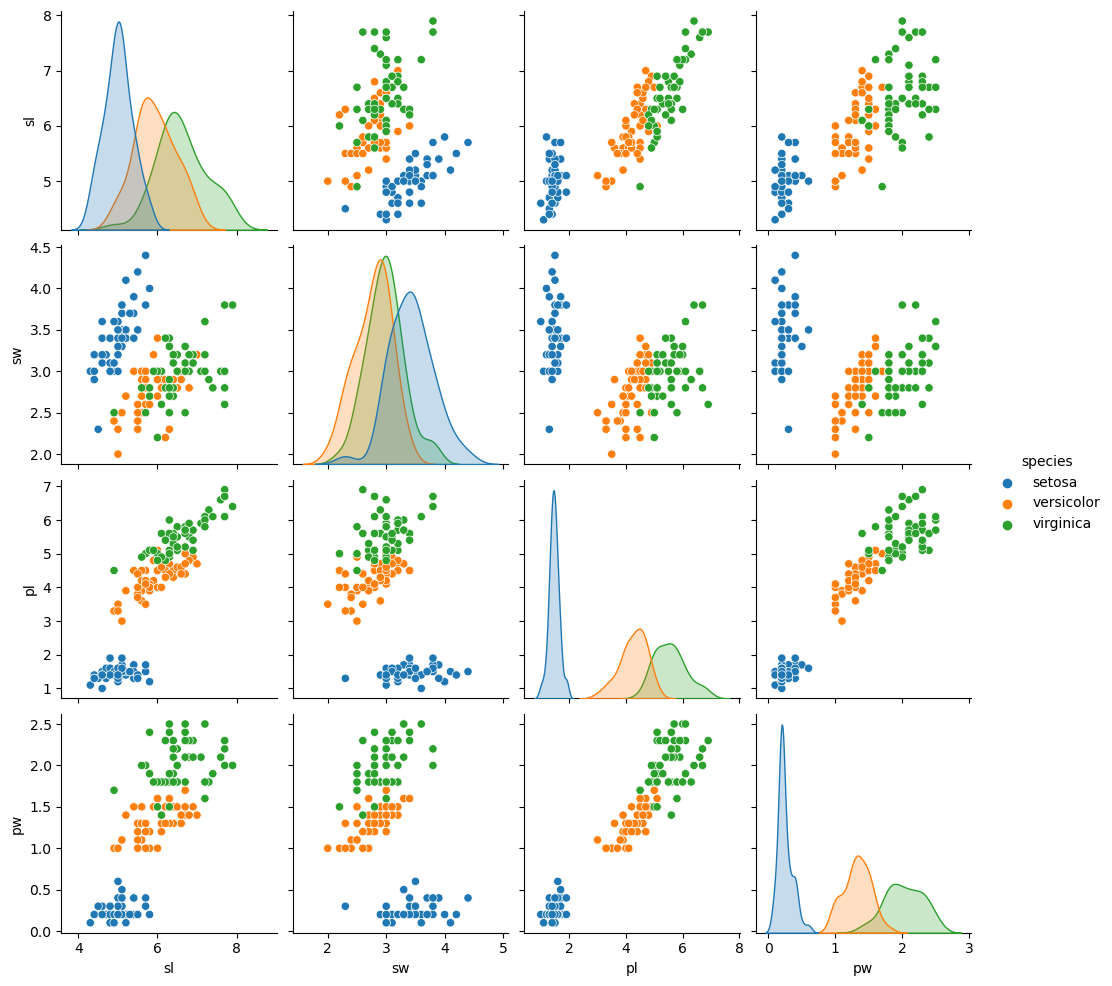

time: 6.92 s (started: 2023-08-07 19:58:36 +05:30)


In [61]:
# visualize the whole dataset
sns.pairplot(iris[['sl','sw','pl','pw','species']], hue="species",diag_kind='kde') 

### Correlation Heatmap

<Axes: >

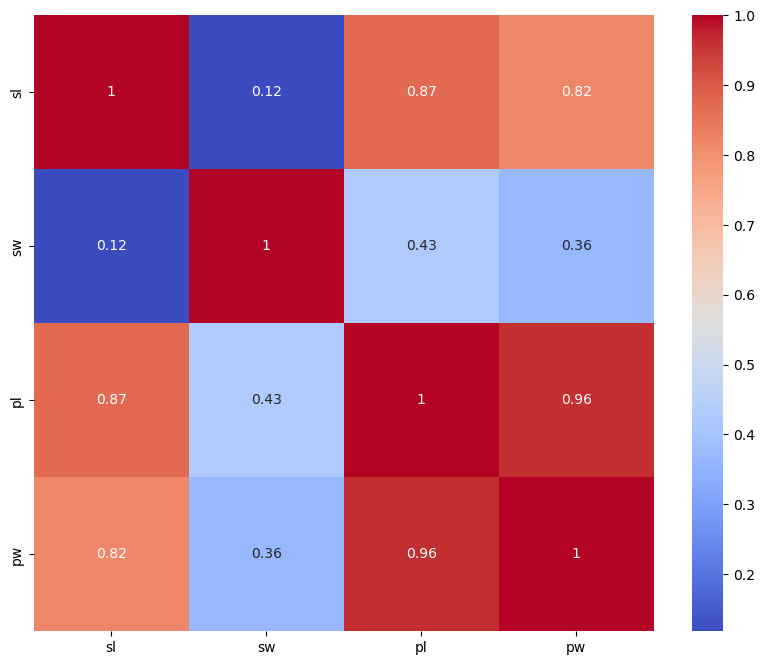

time: 688 ms (started: 2023-08-07 20:04:03 +05:30)


In [63]:
# Plotting correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(abs(iris.corr()), cmap='coolwarm', annot=True)

**Conclusions drawn from above Pair-plot/Scatter-plot, Box-plot and Correlation heatmap**

1. Iris-Setosa can be easily identifies ( PL < 2mm ,PW < 0.8, SL < 6mm , 3 <SW < 4.3mm)

In [16]:
iris.head()

,sl,sw,pl,pw,species
0,1.808289,1.504077,0.875469,0.182322,setosa
1,1.774952,1.386294,0.875469,0.182322,setosa
2,1.740466,1.435085,0.832909,0.182322,setosa
3,1.722767,1.410987,0.916291,0.182322,setosa
4,1.791759,1.526056,0.875469,0.182322,setosa


time: 0 ns (started: 2023-08-12 23:07:26 +05:30)


In [17]:
setosa_species = iris[iris['species'] =='setosa']
versicolor_species = iris[iris['species']=='versicolor']
virginica_species = iris[iris['species'] =='virginica']

time: 0 ns (started: 2023-08-12 23:07:30 +05:30)


In [18]:
setosa_species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       50 non-null     float64
 1   sw       50 non-null     float64
 2   pl       50 non-null     float64
 3   pw       50 non-null     float64
 4   species  50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB
time: 15 ms (started: 2023-08-12 23:07:33 +05:30)


### Binning

In [19]:
# converting categorical variables into numbers
flower_mapping = {'setosa':0,'versicolor':1,'virginica':2}
iris['species']=iris['species'].map(flower_mapping)

time: 15 ms (started: 2023-08-12 23:07:36 +05:30)


In [20]:
iris.head()

,sl,sw,pl,pw,species
0,1.808289,1.504077,0.875469,0.182322,0
1,1.774952,1.386294,0.875469,0.182322,0
2,1.740466,1.435085,0.832909,0.182322,0
3,1.722767,1.410987,0.916291,0.182322,0
4,1.791759,1.526056,0.875469,0.182322,0


time: 15 ms (started: 2023-08-12 23:07:38 +05:30)


###  Data Transformation

In [21]:
import scipy.stats as stat
import pylab 
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

time: 16 ms (started: 2023-08-12 23:08:03 +05:30)


Q-Q Plot for variable: sl
Q-Q Plot for variable: sw
Q-Q Plot for variable: pl
Q-Q Plot for variable: pw


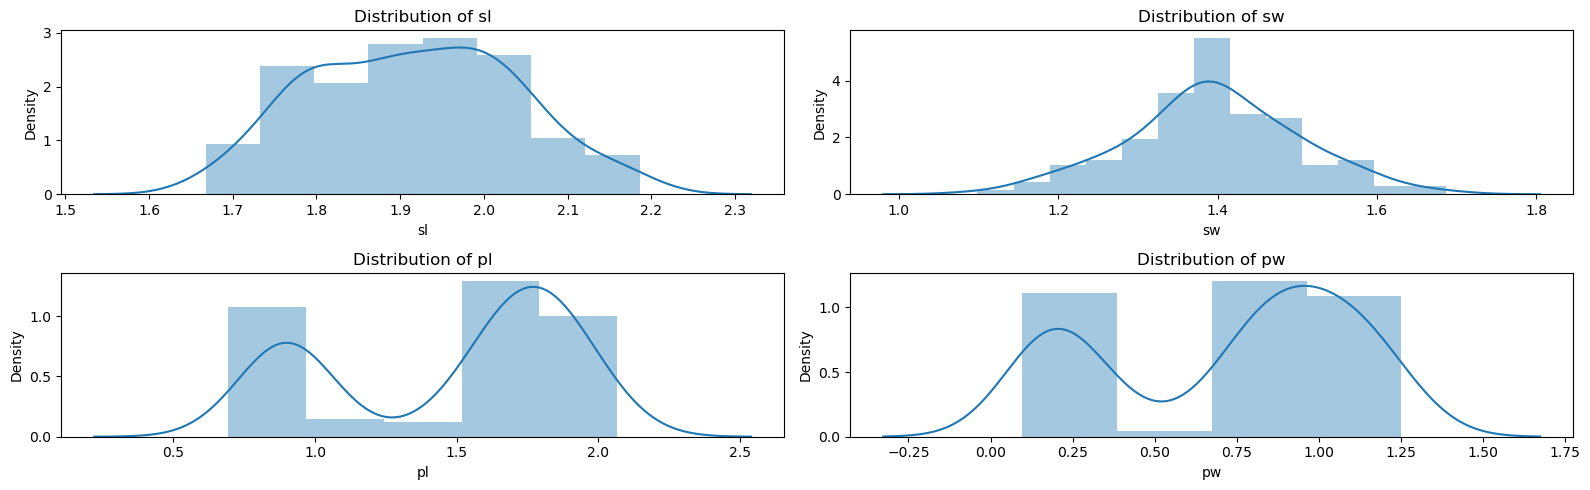

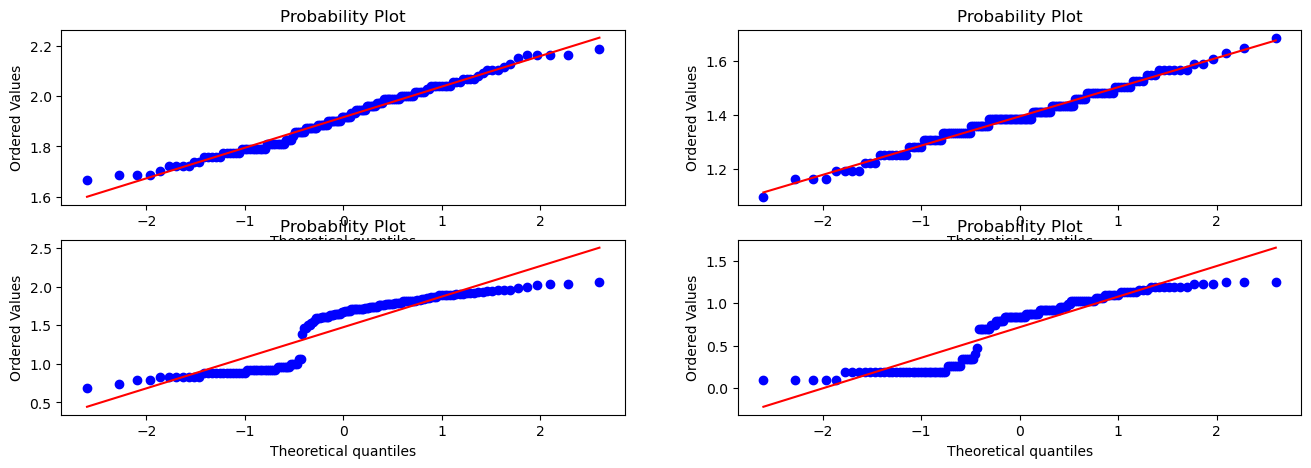

time: 1.17 s (started: 2023-08-12 23:08:09 +05:30)


In [22]:
plt.figure(figsize=(16,5))

for n,col in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,n+1)
  sns.distplot(iris[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
    
plt.figure(figsize=(16,5))
for num,column in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(iris,column)    
    
plt.show()    

In [97]:
# Creating 4 different copies to check the distribution of each of the variable
test_df1=iris.copy()
test_df2=iris.copy()
test_df3=iris.copy()
test_df4=iris.copy()

time: 0 ns (started: 2023-08-08 00:55:17 +05:30)


#### Logarithmic Transformation

Q-Q Plot for variable: sl
Q-Q Plot for variable: sw
Q-Q Plot for variable: pl
Q-Q Plot for variable: pw


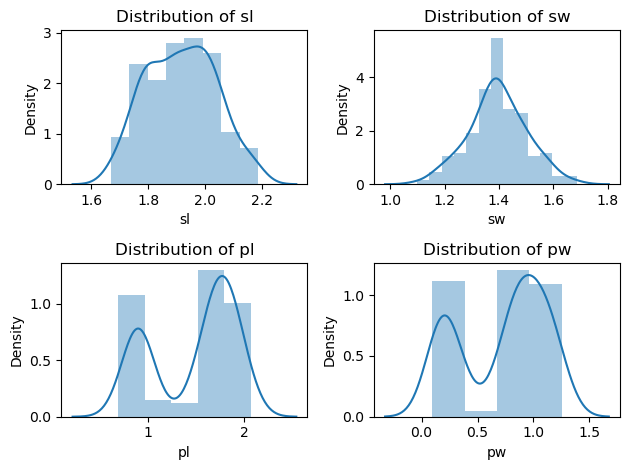

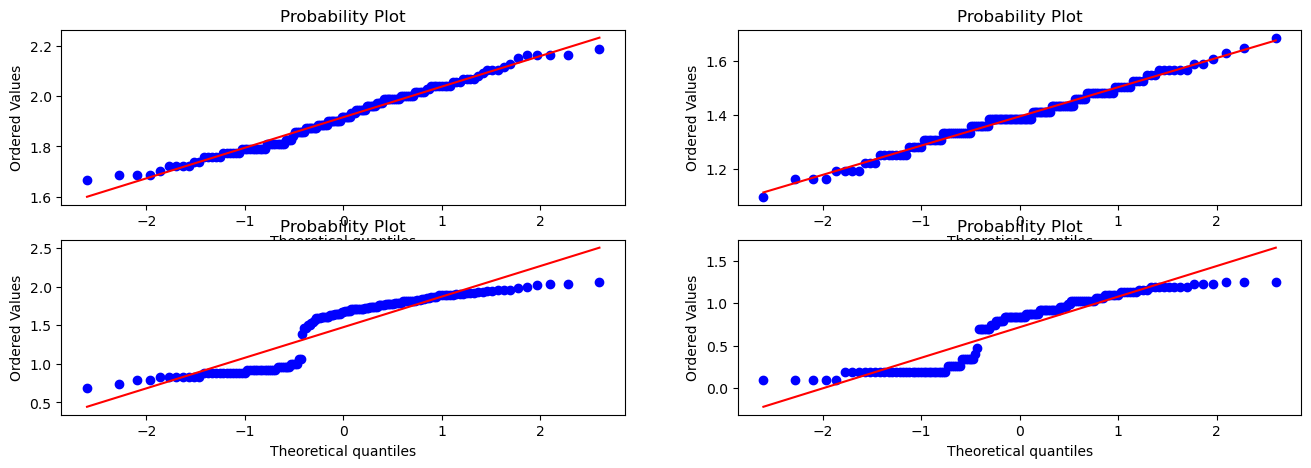

time: 2.02 s (started: 2023-08-08 00:55:20 +05:30)


In [98]:
# Applying transformation on the above considered columns
test_df1['sl']=np.log(test_df1['sl']+1)
test_df1['sw']=np.log(test_df1['sw']+1)
test_df1['pl']=np.log(test_df1['pl']+1)
test_df1['pw']=np.log(test_df1['pw']+1)


for n,col in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
    
plt.figure(figsize=(16,5))
for num,column in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)    
    
plt.show()    

#### Reciprocal Trnasformation

Q-Q Plot for variable: sl
Q-Q Plot for variable: sw
Q-Q Plot for variable: pl
Q-Q Plot for variable: pw


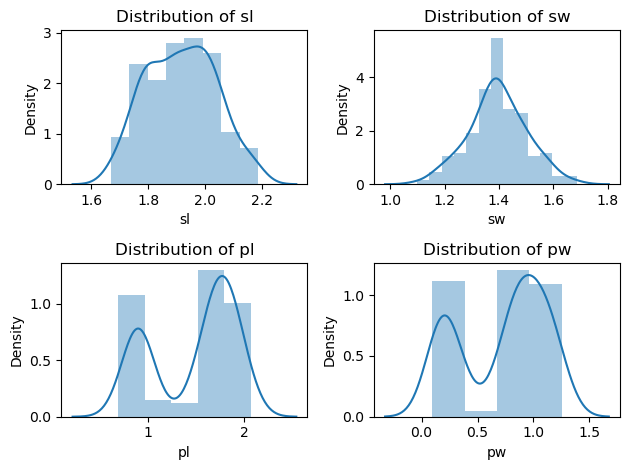

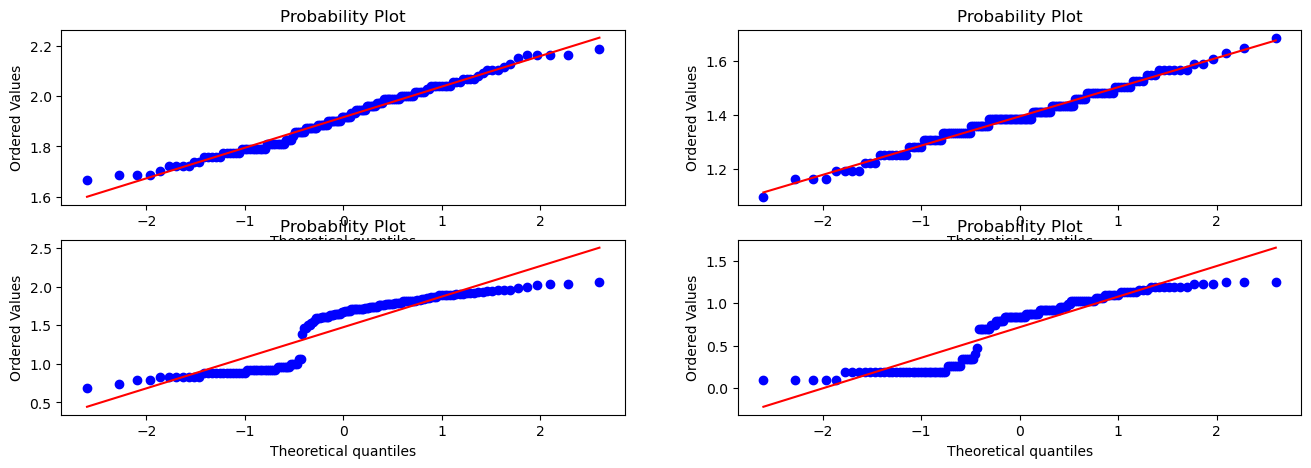

time: 2.47 s (started: 2023-08-08 00:58:39 +05:30)


In [99]:
# Applying transformation on the above considered columns
test_df2['sl']=1/(test_df2['sl']+1)
test_df2['sw']=1/(test_df2['sw']+1)
test_df2['pl']=1/(test_df2['pl']+1)
test_df2['pw']=1/(test_df2['pw']+1)


for n,col in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
    
plt.figure(figsize=(16,5))
for num,column in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)    
    
plt.show()    

#### Square Root Transformation

Q-Q Plot for variable: sl
Q-Q Plot for variable: sw
Q-Q Plot for variable: pl
Q-Q Plot for variable: pw


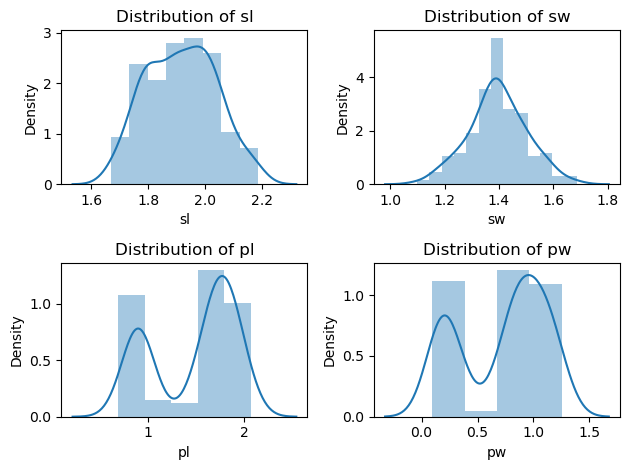

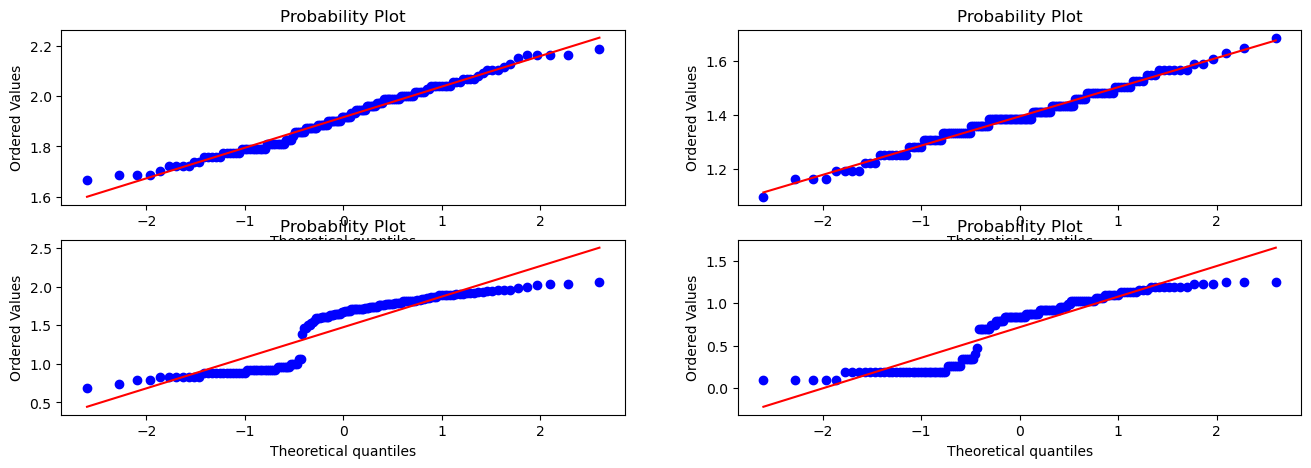

time: 1.81 s (started: 2023-08-08 01:01:13 +05:30)


In [100]:
# Applying transformation on the above considered columns
test_df3['sl']=np.sqrt(test_df3['sl']+1)
test_df3['sw']=np.sqrt(test_df3['sw']+1)
test_df3['pl']=np.sqrt(test_df3['pl']+1)
test_df3['pw']=np.sqrt(test_df3['pw']+1)


for n,col in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
    
plt.figure(figsize=(16,5))
for num,column in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)    
    
plt.show()    

#### Cube Root Transformation

Q-Q Plot for variable: sl
Q-Q Plot for variable: sw
Q-Q Plot for variable: pl
Q-Q Plot for variable: pw


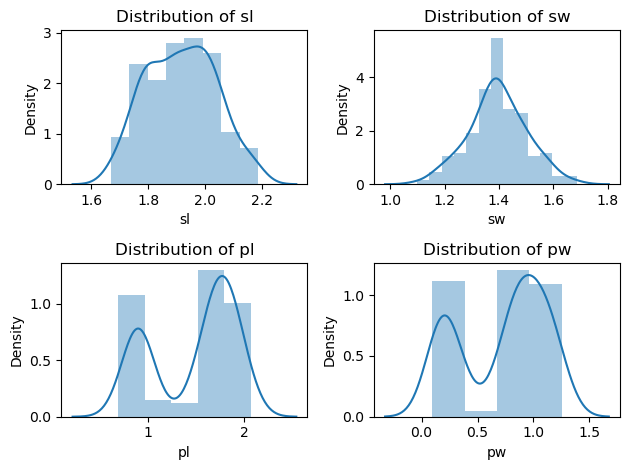

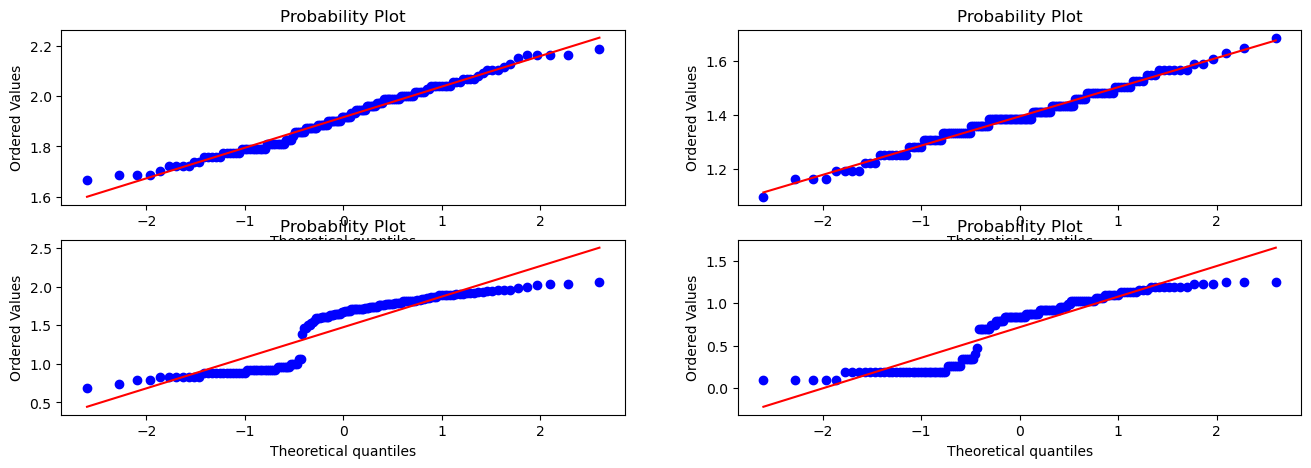

time: 2 s (started: 2023-08-08 01:03:27 +05:30)


In [101]:
# Applying transformation on the above considered columns
test_df4['sl']=np.cbrt(test_df4['sl']+1)
test_df4['sw']=np.cbrt(test_df4['sw']+1)
test_df4['pl']=np.cbrt(test_df4['pl']+1)
test_df4['pw']=np.cbrt(test_df4['pw']+1)


for n,col in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
    
plt.figure(figsize=(16,5))
for num,column in enumerate(['sl', 'sw', 'pl', 'pw']):
  plt.subplot(2,2,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)    
    
plt.show()    

* Data is well normalies before transforamation for SL and SW as clearly seen from Q-Q plots.
* All the transforamations gives similar results.
* We will apply log-transformation

In [23]:
# Applying Log transformation on the above considered columns
iris['sl']=np.log(iris['sl']+1)
iris['sw']=np.log(iris['sw']+1)
iris['pl']=np.log(iris['pl']+1)
iris['pw']=np.log(iris['pw']+1)

time: 16 ms (started: 2023-08-12 23:08:21 +05:30)


### Data Splitting

In [24]:
# Split your data to train and test. Choose Splitting ratio wisely.

x= iris.drop(columns='species',axis=1)
y= iris[['species']]

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

time: 15 ms (started: 2023-08-12 23:08:32 +05:30)


In [25]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
species
0          40
1          40
2          39
dtype: int64
Distribution of classes of dependent variable in test :
species
0          10
1          10
2          10
dtype: int64
time: 0 ns (started: 2023-08-12 23:08:41 +05:30)


**What data splitting ratio have you used?**

Train Set - 80

Test Set - 20

In [26]:
print(x.shape)
print(y.shape)

(149, 4)
(149, 1)
time: 0 ns (started: 2023-08-12 23:09:08 +05:30)


## ML Model - 1  Logistic Regression

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='auto', max_iter=100)

# Train the model
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
class_names = [f'Class {i}' for i in range(iris['species'].nunique())]
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print(classification_rep)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.93
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        12
     Class 1       0.83      1.00      0.91        10
     Class 2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]
time: 31 ms (started: 2023-08-12 23:13:44 +05:30)


## ML Model - 2  Random Forest

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# # Generate sample data
# np.random.seed(0)
# num_samples = 1000
# num_features = 10
# num_classes = 3

# X = np.random.randn(num_samples, num_features)
# y = np.random.randint(0, num_classes, size=num_samples)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
class_names = [f'Class {i}' for i in range(iris['species'].nunique())]
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print(classification_rep)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        12
     Class 1       0.91      1.00      0.95        10
     Class 2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[12  0  0]
 [ 0 10  0]
 [ 0  1  7]]
time: 125 ms (started: 2023-08-12 23:14:06 +05:30)


## Conclusion -
This indicates that the model correctly predicted **97%** of the iris flower species in the test data.

   #   THANK YOU